In [1]:
#Pedro Rodrigues Santos
#RA: 2102790

In [2]:
#libs utilizadas em todo o projeto
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

#lib para filtrar avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Lendo os dados
BaseDados = pd.read_csv('Dados_Incendios.csv', encoding='latin-1')

#Verificando os dados
BaseDados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#Verificando dados nulos
BaseDados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [5]:
#Estatisticas
BaseDados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [6]:
#Informações
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
#Verificando campos unicos
BaseDados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

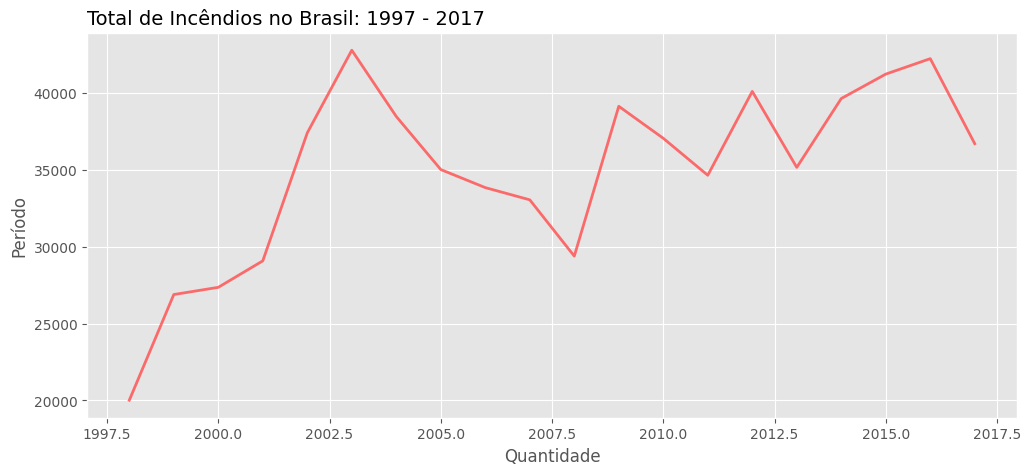

In [8]:
#Analise dos incêndios por ano
Analise = BaseDados.groupby(by=['year']).sum().reset_index()
Analise.head()

plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Total de Incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85);

plt.xlabel('Quantidade')
plt.ylabel('Período');

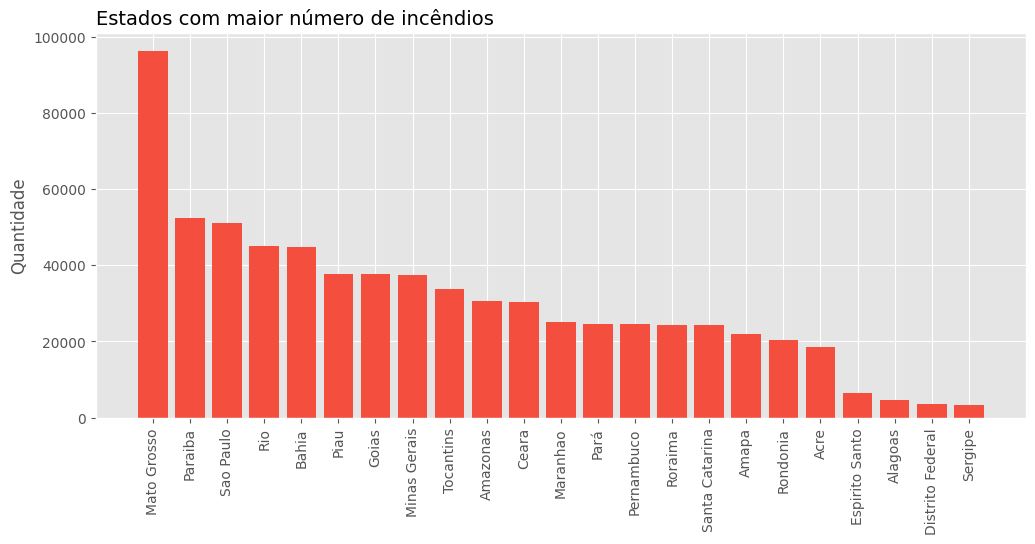

In [9]:
#Analise dos Incêndios por Estado
Analise2 = BaseDados.groupby(by= ['state']).sum().reset_index()[['state','number']].sort_values('number',ascending=False)
Analise2.head()

plt.figure(figsize=(12,5))
plt.title('Estados com maior número de incêndios', loc='left', fontsize=14)
plt.bar(Analise2.state, Analise2['number'], color='#f44e3f')
plt.ylabel('Quantidade')
plt.xticks(rotation=90);


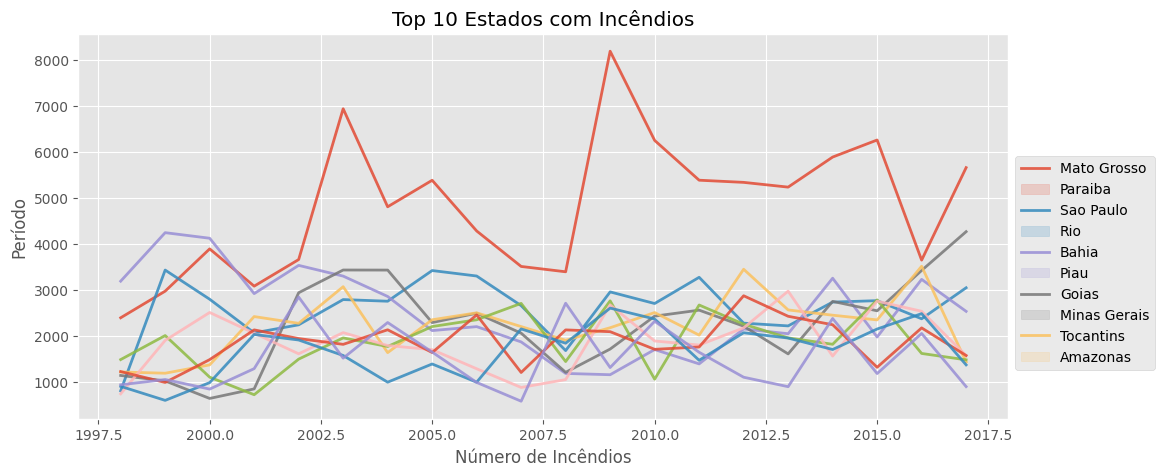

In [10]:
#Top 10 Estados com Incêndios
Lista = Analise2['state'][0:10].values
plt.figure(figsize=(12,5))
plt.title('Top 10 Estados com Incêndios')
for Coluna in Lista:
    Filtro = BaseDados.loc[BaseDados['state'] == Coluna]
    Local = Filtro.groupby(by=['year']).sum().reset_index()
    sns.lineplot(data=Local, x='year', y='number', lw=2, alpha=0.85)

plt.ylabel('Período')
plt.xlabel('Número de Incêndios')

plt.legend(Lista, bbox_to_anchor=(1, 0.7));